In [7]:
from __future__ import print_function
import numpy as np
import pandas as pd
import IPython
from IPython.core.display import HTML
from scipy.io import wavfile
import librosa
import scipy
from IPython.display import Audio


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
df_speech = pd.read_csv('data/slr/line_index.tsv', sep='\t')
# df_users = pd.read_csv('users.tsv', sep='\t')
df_text = pd.read_csv('data/slr/line_index_male_shuf.tsv', sep='\t')

In [10]:
df_speech.head()

,mlf_02879_01795762363,കൂടുതൽ വിവരങ്ങൾ വരുമ്പോൾ തിരിച്ചു ചേർക്കാം
0,mlf_05401_00863865118,അതിന്റെ വികസിതദശയിൽ ഏതാണ്ട് മുപ്പതോളം ക്ഷേത്രങ...
1,mlf_03132_01162270189,അത്തരം ഏറ്റുപറയൽ അനുരഞ്ജനപ്രക്രിയയുടെ ഭാഗമാണ്
2,mlf_03228_01299568667,ആരെങ്കിലും ആ പൊതുനിലപാട് സ്വീകരിച്ചില്ലെന്നത് ...
3,mlf_06469_02146596867,അദ്ദേഹം നൂറ്റിയിരുപത്തിയേഴ് റണ്ണുകൾ വാരിക്കൂട്ടി
4,mlf_01130_00441435203,അർത്ഥം അയക്കപ്പെട്ടവൻ എന്നാണ്


In [11]:
df_text.head()

,mlm_06515_00528230142,ആ വാദം അലസമനസ്സുകളുടെ തലയിണ ആണെന്നായിരുന്നു അദ്ദേഹത്തിന്റെ പക്ഷം
0,mlm_03993_02131005298,ആഫ്രിക്കൻ സവാന ആനകൾക്ക് പിൻ‌കാലുകളിൽ മൂന്നു വീ...
1,mlm_03048_02016759203,അടിമവ്യവസ്ഥയെ ന്യായീകരിക്കാൻ അദ്ദേഹം ബൈബിളിലെ ...
2,mlm_08822_01353318153,അതുകൊണ്ട് ജോണിന് ഫെബ്രുവരി വരെ കാത്തിരിക്കേണ്ട...
3,mlm_08777_00184632174,തമിഴ് തെലുങ്ക് ചിത്രങ്ങളിലെ ഒരു നടിയാണ് തൃഷ എന...
4,mlm_02501_01210831874,ഇടത് ഉള്ള എക്സിറ്റ് സ്വീകരിക്കുക


In [12]:
df_text.count()

mlm_06515_00528230142                                               2022
ആ വാദം അലസമനസ്സുകളുടെ തലയിണ ആണെന്നായിരുന്നു അദ്ദേഹത്തിന്റെ പക്ഷം    2022
dtype: int64

In [13]:
IPython.display.Audio("data/slr/male/mlm_00269_00156195788.wav")

In [14]:
# Librosa getting started
filename = librosa.util.example_audio_file()

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)


Estimated tempo: 129.20 beats per minute
[ 0.11609977  0.55727891  0.99845805  1.46285714  1.92725624  2.39165533
  2.83283447  3.29723356  3.76163265  4.22603175  4.69043084  5.15482993
  5.61922902  6.08362812  6.52480726  6.98920635  7.45360544  7.91800454
  8.38240363  8.87002268  9.31120181  9.77560091 10.24       10.70439909
 11.14557823 11.60997732 12.07437642 12.53877551 13.0031746  13.4675737
 13.93197279 14.39637188 14.83755102 15.27873016 15.74312925 16.20752834
 16.67192744 17.11310658 17.60072562 18.04190476 18.52952381 18.97070295
 19.43510204 19.89950113 20.36390023 20.80507937 21.29269841 21.73387755
 22.2214966  22.66267574 23.12707483 23.59147392 24.05587302 24.49705215
 24.96145125 25.42585034 25.91346939 26.35464853 26.81904762 27.28344671
 27.7478458  28.18902494 28.65342404 29.11782313 29.60544218 30.06984127
 30.53424036 30.9754195  31.43981859 31.88099773 32.36861678 32.83301587
 33.29741497 33.7385941  34.2029932  34.66739229 35.13179138 35.57297052
 36.0605895

In [15]:
y, sr = librosa.load("data/slr/male/mlm_00269_00156195788.wav")
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

Estimated tempo: 161.50 beats per minute
[0.23219955 0.60371882 0.9752381  1.34675737 1.69505669 2.04335601
 2.41487528 2.7631746  3.13469388 3.50621315 3.87773243 4.22603175]


In [16]:
y, sr = librosa.load("data/msc-master/audio/3dae3e2f-5676-40e4-bf19-cd513c8ffb3f.webm")
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

/home/kurian/data/.env/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Estimated tempo: 86.13 beats per minute
[0.13931973 0.85913832]


In [17]:
Audio(y, rate=sr*2)

In [18]:
Audio(y,rate=sr/2)

In [19]:
print(f"Sample rate  :", sr)
print(f"Signal Length:{len(y)}")
print(f"Duration     : {len(y)/sr}seconds")

Sample rate  : 22050
Signal Length:84672
Duration     : 3.84seconds


In [20]:
print("Type  :", type(y))
print("Signal: ", y)
print("Shape :", y.shape)

Type  : <class 'numpy.ndarray'>
Signal:  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.8042719e-05
 -2.5548372e-05 -3.5344372e-05]
Shape : (84672,)



## Waveforms. Amplitude vs Magnitude

A waveform is a curve showing the amplitude of the soundwave (y-axis) at time T (x-axis). Let's check out the waveform of our audio clip


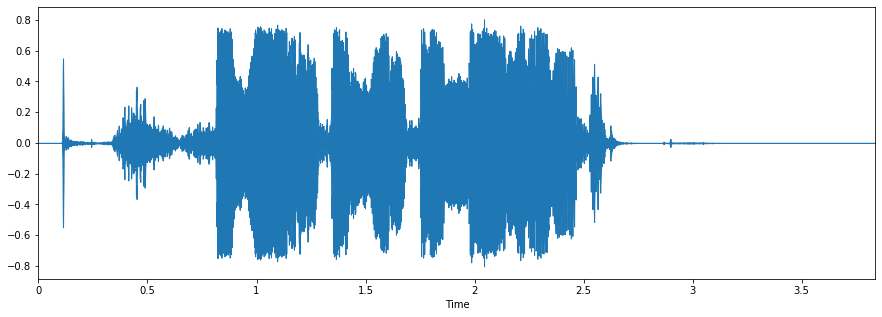

In [21]:
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr)

## Frequency and Pitch



Most of us remember frequency from physics as cycles per second of a wave. It's the same for sound, but really hard to see in the above image. How many cycles are there? How can there be cycles if it's not regular? The reality is that sound is extremely complex, and the above recording of human speech is the combination of many different frequencies added together. To talk about frequency and pitch, it's easier to start with a pure tone, so let's make one.

Human hearing ranges from 20hz to 20,000hz, hz=hertz=cycles per second. The higher the frequency, the more cycles per second, and the "higher" the pitch sounds to us. To demonstrate, let's make a sound at 500hz, and another at 5000hz.


In [22]:
def make_tone(freq, clip_length=1, sr=16000):
    t = np.linspace(0, clip_length, int(clip_length*sr), endpoint=False)
    return 0.1*np.sin(2*np.pi*freq*t)
clip_500hz = make_tone(500)
clip_5000hz = make_tone(5000)

In [23]:
Audio(clip_5000hz, rate=sr)

## mel-spectogram

The mel scale is a human-centered metric of audio perception that was developed by asking participants to judge how far apart different tones were. Here is a formula from mel-scale's wikipedia page that you will never need, but might like to see.

Just like frequency, human perception of loudness occurs on a logarithmic scale. A constant increase in the amplitude of a wave will be perceived differently if the original sound is soft or loud.

Decibels measure the ratio of power between 2 sounds, with the main idea being that each 10x increase in the energy of the wave (multiplicative) results in a 10dB increase in sound (additive). Thus something that is 20dB louder has 100x (10*10) the amount of energy, something that is 25dB louder has (10^2.5) = 316.23x more energy.

### Spectogram



Remember how it was impossible to see the smooth cycles and frequencies in the raw waveform graph of our first audio clip? A spectrogram is an almost magical way of breaking a complex signal apart into it's constituent frequencies, and then representing that as an image. Before we get into how this actually happens, let's see what they look like and how to generate and play with them, because this is more important for training your models than actually understanding what a fourier transform is and how it works.

Librosa allows us to generate a spectrogram with the melscale directly using librosa.feature.melspectrogram. To demonstrate why the previous discussion of melscale and decibels was necessary, we'll first display a raw spectrogram with librosa.stft, then a melspectrogram, and then finally a melspectrogram on the decibel scale.

sg = spectrogram, this is a raw energy spectrogram. stft = short-time fourier transform. stft returns a complex result with a real component, the magnitude, and a complex part, the phase. The complex part is typically not used in machine learning applications, but there are a few papers that suggest it is useful so you may want to experiment. For now we will discard it.


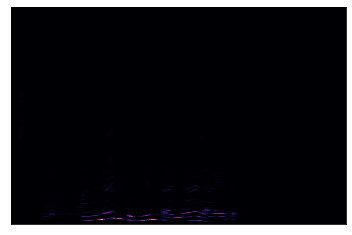

In [24]:
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)
display(librosa.display.specshow(sg_mag))

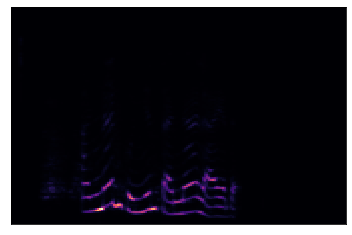

In [25]:
sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
display(librosa.display.specshow(sg1))

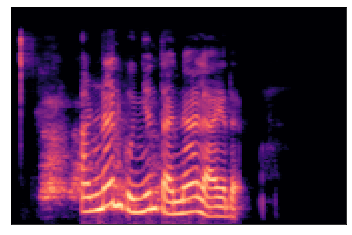

In [26]:
sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2)

### What's inside a spectogram?



Now we can see, just like when we plotted the audio, the x-axis is time, but now, instead of the amplitude of the wave on the y-axis, we have the frequency. The y-axis is also no longer linear, each new tick doubles the frequency, with a max frequency, or fmax of 8000. Also, this isn't a line graph like the raw waveform, instead of a single value at each timepoint on our x-axis, we have many. Every point in the square represents the energy at the frequency of it's y-coordinate at the time of it's x-coordinate.

Take the point 1.5 seconds in at 1024hz, it appears to be cream colored meaning the energy at that point is somewhere around 80-85db. Meanwhile at that same time, 4096hz appears to be purple and have about 40dB of energy. That means that at t = 1.5 seconds, the sound with 1024hz is around 10000 times louder than sound at 4096hz. 10^((80-40)/10) = 10^4 = 10000.

Let's check out the min, max, and mean of the spectrogram. Remember, the units for these are all decibels.


Text(0.5, 1.0, 'Mel spectrogram')

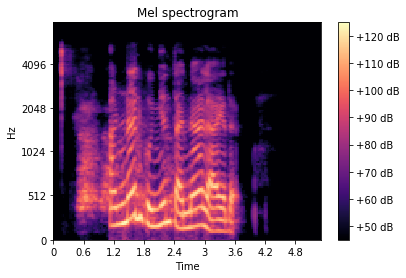

In [27]:
# code adapted from the librosa.feature.melspectrogram documentation
librosa.display.specshow(sg2, sr=16000, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

In [28]:
sg2.min(), sg2.max(), sg2.mean()

(44.98905, 124.98905, 61.409298)

In [29]:
print(type(sg2))
sg2.shape

<class 'numpy.ndarray'>


(128, 166)

Spectrograms become a lot less magical and a lot easier to work with when you realize they're just 2d numpy arrays. We no longer have to remember and call random functions like librosa.display.specshow, with a little tinkering (converting to pytorch, and adding a unit axis) we can just use fastai's Image()

## Spectrogram Parameters and How to Fine Tune them for Deep Learning



Remember those hyperparameters mentioned in the intro? Our experiments indicate they matter a lot. If you don't understand your underlying data, you won't be able to create good visual representations of them. In fastai audio, we do our best to give you good default values, but to get the highest accuracy possible out of your models, you'll need to be able to tune it to your exact needs. Let's tune this one and introduce these parameters in the process.

Here's the same spectrogram, but with all default arguments made explicit.

#### Badly fine tuned things


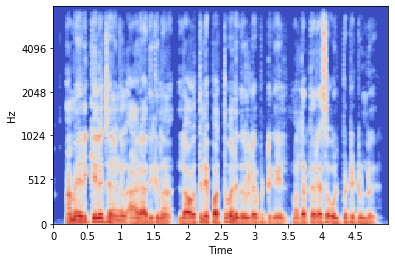

In [30]:
y, sr = librosa.load("data/slr/male/mlm_00269_00156195788.wav")
sg = librosa.feature.melspectrogram(y, sr=1600,  n_fft=2048, hop_length=512, power=1.0, n_mels=128, fmin=0.0, fmax=None)
db_spec = librosa.amplitude_to_db(sg, ref=1.0, amin=1e-05, top_db=80.0)
librosa.display.specshow(db_spec, y_axis='mel', fmax=8000, x_axis='time')

## Hyperparameter modes


    sample_rate, This is not the place to change this, you are just telling librosa what your sample rate is. Usually it is predetermined for you by your dataset but check the resampling section for more info on changing this.
    fmin, minimum frequency to display in spectrogram, this should be low, anything 0-20 seems to work well
    fmax, maximum frequency to display. This should generally be 1/2 of your sample rate, but can be set to 8000 for speech.
    n_mels, How many mel bins to use, this will determine number of pixels tall your sg is. 64-128 are good defaults, but try various values, bigger isn't always better, test for your dataset. Some evidence suggests upscaling the image to a larger size is more effective than
    n_fft, The number of samples you use each time you compute a Fourier Transform. This is the width of the window and hop_length is how much you move the window each step. Increasing n_fft will increase frequency (y-axis) resolution to a point, powers of 2 are faster. Also dependent somewhat on n_mels so 20*n_mels is a common value as less than this can produce empty mel bins (black horizontal lines on sg)
    hop_length, the number of samples between successive frames of your sg. Determines width of image (# samples/hop = width in pixels). Good defaults really depend on dataset and the duration of audio your sg's represent (if they are longer, a larger hop is required to fit on a gpu, but you will be compressing the data). If you go too small, you can get blurring. Anything 64-512 can be good depending on context.
    top_db, Distance between loudest and softest sound you want displayed in spectrogram. If you choose 50db, the brightest pixel will be 50db, and anything that is 50+db lower than that won't be displayed. 80-120 is good.
    power, Honestly not entirely sure how this works. It's set to 1 for "energy" spectrogram and 2 for "power" spectrogram. An energy spectrogram is more detailed (less energy required to show up on the sg) but you don't generally have to worry about this because if you are converting to decibels (you'll do this almost always) it is factored out.

As you can see there are loads, and I'm sure it's overwhelming, but the good news is that most models will train just fine with defaults, only a few of these have a big impact, and they are all pretty easy to understand, it will just take time and changing the values to see what effect it has. The bad news is that I've been lying about our starting spectrogram. Matplotlib is stretching this a lot for us, but unless we save the file as a jpg and train on that (slow) we will have small images. So let's use fastai's Image to see what this really looks like (hint: it's the same dimensions as the underlying numpy array)


## Fourier transforms


Remember a spectrogram is taking a complex signal (the raw waveform) and cracking it open so that instead of the amplitude of the signal at time t, we can see the magnitude of each frequency at time t. Behind this decomposition is the fourier transform. Because it is such an important operation in science, and also so difficult to wrap your head around, many other people have done a better job explaining it than I ever could.

[Explaination](https://www.youtube.com/watch?v=spUNpyF58BY)

In [32]:
# Code adapted from https://musicinformationretrieval.com/fourier_transform.html and the original
# implementation of fastai audio by John Hartquist at https://github.com/sevenfx/fastai_audio/
def fft_and_display(signal, sr):
    ft = scipy.fftpack.fft(signal, n=len(signal))
    ft = ft[:len(signal)//2+1]
    ft_mag = np.absolute(ft)
    f = np.linspace(0, sr/2, len(ft_mag)) # frequency variable
    plt.figure(figsize=(13, 5))
    plt.plot(f, ft_mag) # magnitude spectrum
    plt.xlabel('Frequency (Hz)')
    


## References

- [FastAI audio Introductory](https://github.com/mogwai/fastai_audio/blob/master/tutorials/01_Intro_to_Audio.ipynb)
- [Librosa docs](https://librosa.github.io/librosa/index.html)


## fin for now

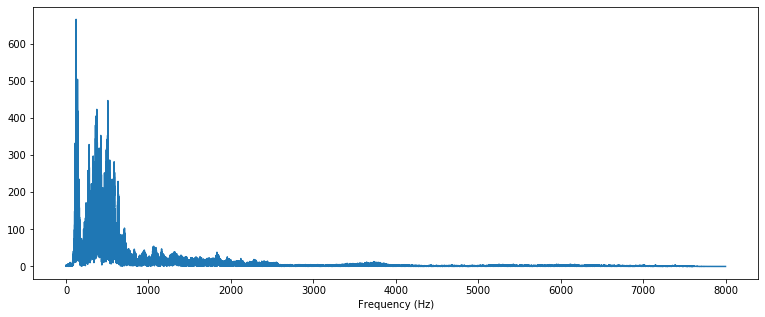

In [21]:
y, sr = librosa.load("data/slr/male/mlm_00269_00156195788.wav", sr=16000)
fft_and_display(y, sr)

In [22]:
import IPython.display as ipd
ipd.Audio('data/msc-master/audio/0092b086-cead-422c-9b2a-0c17f9c26654.webm') 

In [35]:


# Adapted from https://musicinformationretrieval.com/audio_representation.html
# An amazing open-source resource, especially if music is your sub-domain.
def make_tone(freq, clip_length=1, sr=16000):
    t = np.linspace(0, clip_length, int(clip_length*sr), endpoint=False)
    return 0.1*np.sin(2*np.pi*freq*t)



In [36]:


def add_3_random_tones(clip_length=1, sr=16000):
    tone_list = []
    for i in range(3):
        frequency = random.randint(500,8000)
        tone_list.append(make_tone(frequency, clip_length, sr))
        print(f"Frequency {i+1}: {frequency}")
    return sum(tone_list)



In [39]:
s1 = add_3_random_tones(sr=sr)
s2 = add_3_random_tones(sr=sr)
s1_plus_s2 = np.add(s1, s2)
s1_then_s2 = np.concatenate([s1, s2])
display(Audio(s1_plus_s2, rate=sr))
display(Audio(s1_then_s2, rate=sr))

Frequency 1: 3295
Frequency 2: 6345
Frequency 3: 1308
Frequency 1: 1987
Frequency 2: 1137
Frequency 3: 1495


ValueError: zero-dimensional arrays cannot be concatenated

In [38]:
def stft_and_display(signal, n_fft=512, hop_length=128, to_db_scale=False, n_mels=128, mel_scale=False, 
                     top_db=80, show_shape=False):
    stft = librosa.stft(signal, n_fft, hop_length)
    real_portion = abs(stft)
    if(mel_scale):   real_portion = librosa.feature.melspectrogram(S=real_portion, n_fft=n_fft, n_mels=n_mels)
    if(to_db_scale): real_portion = librosa.amplitude_to_db(real_portion, top_db)
    if(show_shape):  print("Shape: {}x{}".format(*real_portion.shape))
    display(Image(torch.from_numpy(real_portion).unsqueeze(0)))
display(Audio(s1_plus_s2, rate=sr))    
stft_and_display(s1_plus_s2)
display(Audio(s1_then_s2, rate=sr))    
stft_and_display(s1_then_s2)

NameError: name 's1_plus_s2' is not defined